In [110]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

from utils import open_csv_file, append_rows_dataframes, create_csv_file
from data import DataFrame
from correlation_matrix import Correlation

In [111]:
raw_data = open_csv_file('data.csv')
df = DataFrame(raw_data)

In [112]:
dataRaw = np.loadtxt('data.csv', delimiter=',', dtype='object')
data_two = dataRaw[1:,1:17]


In [113]:
header = df.get_df().iloc[0,:]
header

Unnamed: 0                0.000000
Work_Experience           0.000000
Family_Size               0.000000
Graduated_No              0.000000
Graduated_Yes             1.000000
Graduated_nan             0.000000
Profession_encoded        0.222222
Var_1_encoded             0.714286
Gender_Female             1.000000
Gender_Male               0.000000
Ever_Married_No           0.000000
Ever_Married_Yes          1.000000
Ever_Married_nan          0.000000
Spending_Score_Average    0.000000
Spending_Score_High       0.000000
Spending_Score_Low        1.000000
Age_bucket                0.250000
Name: 0, dtype: float64

In [114]:
data = df.get_df().iloc[1:,1:17]
data

,Work_Experience,Family_Size,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Age_bucket
1,0.571429,0.375,0.0,1.0,0.0,0.555556,0.714286,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.50
2,0.000000,0.000,1.0,0.0,0.0,1.000000,0.714286,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00
3,0.785714,0.125,1.0,0.0,0.0,0.444444,0.714286,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00
4,0.182375,0.375,1.0,0.0,0.0,0.888889,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00
5,0.000000,0.500,0.0,1.0,0.0,0.111111,0.428571,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,0.642857,0.375,1.0,0.0,0.0,0.555556,0.714286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25
5240,0.071429,0.000,0.0,1.0,0.0,0.111111,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25
5241,0.182375,0.125,0.0,1.0,0.0,0.333333,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.75
5242,0.071429,0.500,0.0,1.0,0.0,0.444444,0.428571,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.75


In [115]:
df.get_df().iloc[:,1]

0       0.000000
1       0.571429
2       0.000000
3       0.785714
4       0.182375
          ...   
5239    0.642857
5240    0.071429
5241    0.182375
5242    0.071429
5243    0.642857
Name: Work_Experience, Length: 5244, dtype: float64

In [116]:
# fig, ax = plt.subplots()
# ax.scatter(df.get_df().iloc[:,1],df.get_df().iloc[:,2] )

In [118]:
data_two

array([['0.0', '0.0', '0.0', ..., '0.0', '1.0', '0.25'],
       ['0.5714285714285714', '0.375', '0.0', ..., '0.0', '0.0', '0.5'],
       ['0.0', '0.0', '1.0', ..., '0.0', '1.0', '1.0'],
       ...,
       ['0.1823746893751136', '0.125', '0.0', ..., '0.0', '1.0', '0.75'],
       ['0.07142857142857142', '0.5', '0.0', ..., '1.0', '0.0', '0.75'],
       ['0.6428571428571428', '0.25', '0.0', ..., '0.0', '1.0', '0.5']],
      dtype=object)

In [117]:
kmeans = KMeans(n_clusters=3, n_init=15)
kmeans.fit(data_two)
# print("WCSS: ", kmeans.inertia_)
# print("Iternations until converged: ", kmeans.n_iter_)
# print("Final centroids: ")
# print(kmeans.cluster_centers_)
# print("Cluster assignments ")
# print(kmeans.labels_)

AttributeError: 'numpy.ndarray' object has no attribute 'drop'

In [ ]:
df_2 = DataFrame(data)

In [ ]:
df_2.get_df()

,Work_Experience,Family_Size,Graduated_No,Graduated_Yes,Graduated_nan,Profession_encoded,Var_1_encoded,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Ever_Married_nan,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Age_bucket
1,0.571429,0.375,0.0,1.0,0.0,0.555556,0.714286,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.50
2,0.000000,0.000,1.0,0.0,0.0,1.000000,0.714286,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.00
3,0.785714,0.125,1.0,0.0,0.0,0.444444,0.714286,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.00
4,0.182375,0.375,1.0,0.0,0.0,0.888889,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.00
5,0.000000,0.500,0.0,1.0,0.0,0.111111,0.428571,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5239,0.642857,0.375,1.0,0.0,0.0,0.555556,0.714286,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25
5240,0.071429,0.000,0.0,1.0,0.0,0.111111,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.25
5241,0.182375,0.125,0.0,1.0,0.0,0.333333,0.714286,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.75
5242,0.071429,0.500,0.0,1.0,0.0,0.444444,0.428571,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.75


In [ ]:
kmeans.labels_

array([1, 2, 1, ..., 0, 2, 0], dtype=int32)

In [ ]:
data_two

array([['0.0', '0.0', '0.0', ..., '0.0', '1.0', '0.25'],
       ['0.5714285714285714', '0.375', '0.0', ..., '0.0', '0.0', '0.5'],
       ['0.0', '0.0', '1.0', ..., '0.0', '1.0', '1.0'],
       ...,
       ['0.1823746893751136', '0.125', '0.0', ..., '0.0', '1.0', '0.75'],
       ['0.07142857142857142', '0.5', '0.0', ..., '1.0', '0.0', '0.75'],
       ['0.6428571428571428', '0.25', '0.0', ..., '0.0', '1.0', '0.5']],
      dtype=object)

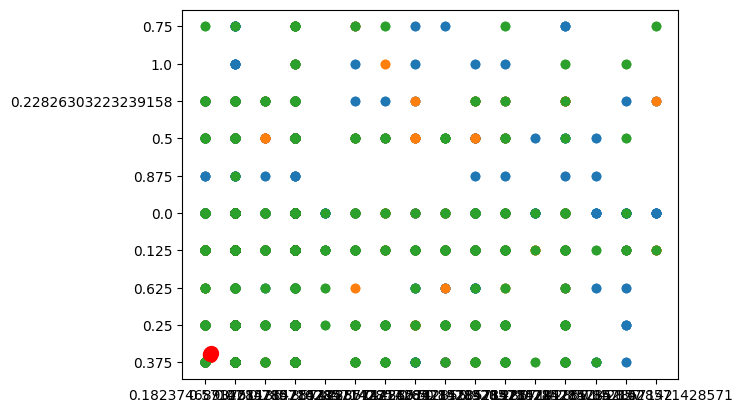

In [ ]:
fig, ax = plt.subplots()
idxs = np.unique(kmeans.labels_)

for i in idxs:
    #Points of cluster
    #  The : after the comma indicates that all columns should be selected for the selected rows.
    points = data_two[kmeans.labels_==i,:]
    # Plot points
    plt.scatter(points[:,0], points[:,1])
    # Plot centroids
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], s=100, c='red')

# #Aesthetics
# ax.set_title('K-Means clustering')
# ax.set_xlabel(header[0])
# ax.set_ylabel(header[1])